In [1]:
# kommenteeri välja kui vaja
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/IDSProject2024_StudentPerformance/'

Mounted at /content/drive


In [2]:

import pandas as pd

try:
  df = pd.read_csv(file_path+"StudentPerformanceFactors.csv",sep=',')
  #df = pd.read_csv(file_path+"StudentPerformanceFactorsPuhas.csv",sep=';')
  print("DataFrame created successfully.")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


DataFrame created successfully.


In [3]:
#trükime välja 50 esimest kirjet
print(df.tail(50))

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6557             27          78               Medium              Medium   
6558             24          78                 High              Medium   
6559             28          72                  Low              Medium   
6560             18          83               Medium                High   
6561             28          66               Medium                 Low   
6562             19          91               Medium                 Low   
6563             29          73                  Low                 Low   
6564             20          84                 High              Medium   
6565             24          89               Medium                 Low   
6566             29          96                 High              Medium   
6567             19          93               Medium                High   
6568             21          84                 High                 Low   
6569        

In [4]:


# Find rows with empty cells
rows_with_empty_cells = df[df.isnull().any(axis=1)]
print("\nRows with empty cells:")
print(rows_with_empty_cells)

# Find columns with empty cells
cols_with_empty_cells = df.columns[df.isnull().any()]
print("\nColumns with empty cells:")
columns_to_check =  cols_with_empty_cells.tolist()
print(columns_to_check)



Rows with empty cells:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
33               14          60                 High              Medium   
127              17          97               Medium              Medium   
240              15          87                  Low              Medium   
275              23          82                  Low              Medium   
316              24          90                  Low                 Low   
...             ...         ...                  ...                 ...   
6502             23          64               Medium              Medium   
6579              9          84               Medium              Medium   
6589             22          90                  Low                High   
6594              9          90                 High                High   
6596             17          92               Medium              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  

In [5]:

#['Gender', 'EthnicGroup', 'ParentEduc']  # Replace with your actual column names

for col in columns_to_check:
  try:
    unique_values = df[col].unique()
    print(f"\nUnique values for column '{col}':")
    print(unique_values)
  except KeyError:
    print(f"Error: Column '{col}' not found in the DataFrame.")


Unique values for column 'Teacher_Quality':
['Medium' 'High' 'Low' nan]

Unique values for column 'Parental_Education_Level':
['High School' 'College' 'Postgraduate' nan]

Unique values for column 'Distance_from_Home':
['Near' 'Moderate' 'Far' nan]


In [6]:

# Find the most frequent value for each specified column
#columns_to_check = ['Gender', 'EthnicGroup', 'ParentEduc']  # Replace with your actual column names

for col in columns_to_check:
    try:
        # Use value_counts() to get the frequency of each unique value
        value_counts = df[col].value_counts()

        # Get the most frequent value and its count
        most_frequent_value = value_counts.index[0]
        most_frequent_count = value_counts.iloc[0]

        print(f"\nMost frequent value for column '{col}': {most_frequent_value} (Count: {most_frequent_count})")

    except KeyError:
        print(f"Error: Column '{col}' not found in the DataFrame.")
    except IndexError:  # Handle cases where a column might be empty
      print(f"Error: Column '{col}' is empty or has no values.")


Most frequent value for column 'Teacher_Quality': Medium (Count: 3925)

Most frequent value for column 'Parental_Education_Level': High School (Count: 3223)

Most frequent value for column 'Distance_from_Home': Near (Count: 3884)


In [7]:


# Replace empty cells in specified columns with the most frequent value in each column
for col in columns_to_check:
    try:
        # Use value_counts() to get the frequency of each unique value
        value_counts = df[col].value_counts()

        # Get the most frequent value
        most_frequent_value = value_counts.index[0]

        # Fill NaN values with the most frequent value
        df[col].fillna(most_frequent_value, inplace=True)

        print(f"Empty cells in column '{col}' replaced with '{most_frequent_value}'")

    except KeyError:
        print(f"Error: Column '{col}' not found in the DataFrame.")
    except IndexError:  # Handle cases where a column might be empty
        print(f"Error: Column '{col}' is empty or has no values. Skipping...")

# Verify the changes (optional)
#print("\nDataFrame after replacing empty cells:")
#print(df.head(50))

rows_with_empty_cells_after = df[df.isnull().any(axis=1)]
print("\nRows with empty cells (after replacement):")
rows_with_empty_cells_after

Empty cells in column 'Teacher_Quality' replaced with 'Medium'
Empty cells in column 'Parental_Education_Level' replaced with 'High School'
Empty cells in column 'Distance_from_Home' replaced with 'Near'

Rows with empty cells (after replacement):


<ipython-input-7-97b117db44a1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent_value, inplace=True)
<ipython-input-7-97b117db44a1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


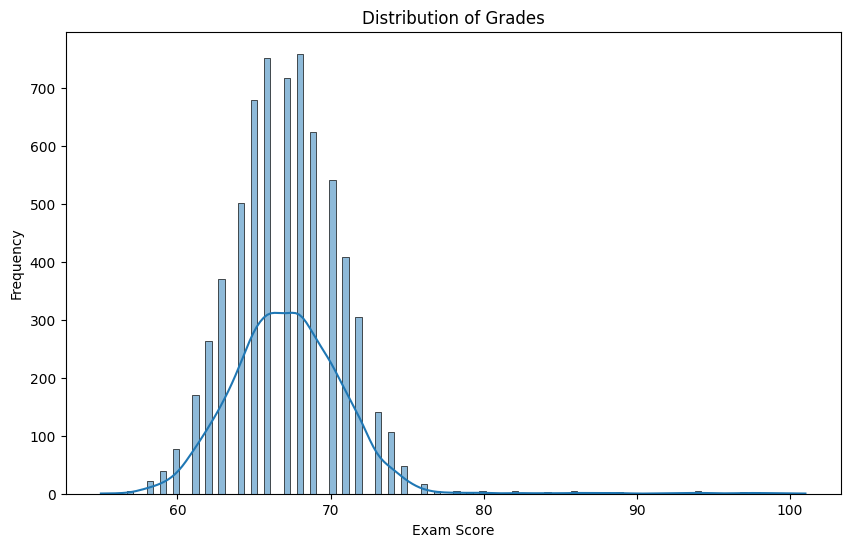

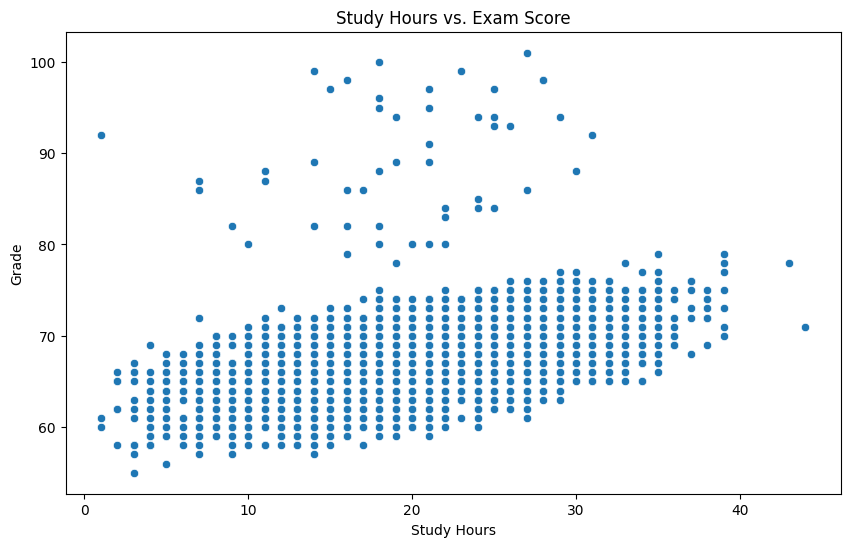

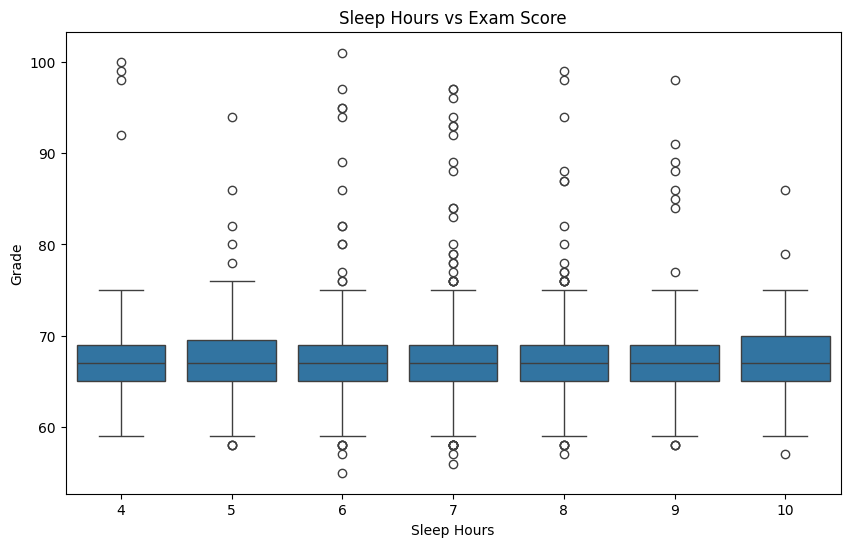

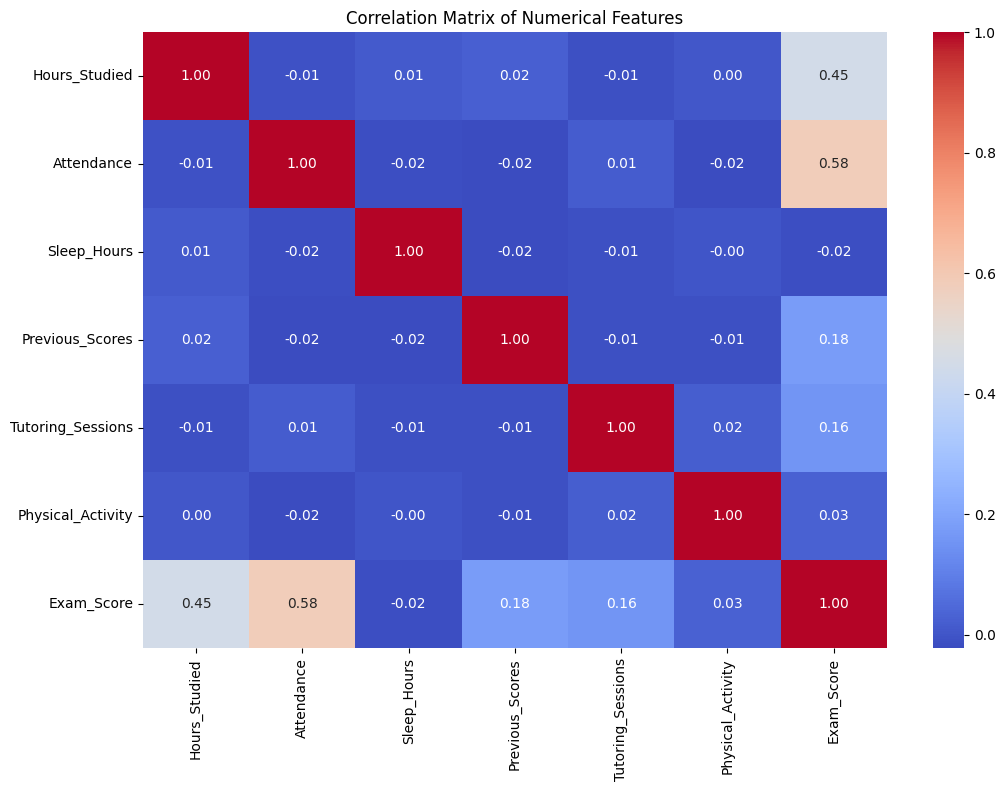

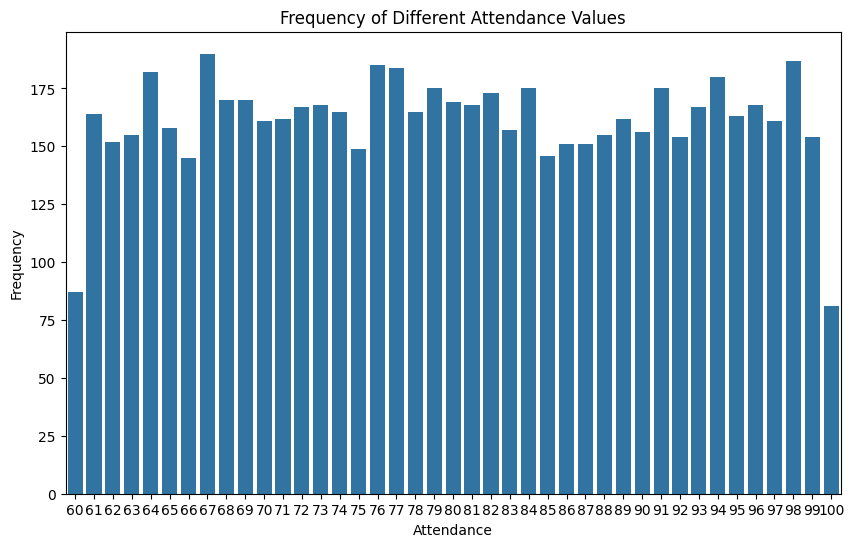

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the dataframe exists
if 'df' in locals():
    # 1. Distribution of Grades
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Exam_Score'], kde=True)
    plt.title('Distribution of Grades')
    plt.xlabel('Exam Score')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Relationship between Study Hours and Grade
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
    plt.title('Study Hours vs. Exam Score')
    plt.xlabel('Study Hours')
    plt.ylabel('Grade')
    plt.show()

    # 3. Impact of SleepHours on Grade
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=df)
    plt.title('Sleep Hours vs Exam Score')
    plt.xlabel('Sleep Hours')
    plt.ylabel('Grade')
    plt.show()


    # 4. Correlation Matrix Heatmap (for numerical features)
    numerical_cols = df.select_dtypes(include=['number']).columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # 5.  Example: Bar plot of the frequency of different attendance values.
    plt.figure(figsize=(10,6))
    sns.countplot(x='Attendance', data=df)
    plt.title('Frequency of Different Attendance Values')
    plt.xlabel('Attendance')
    plt.ylabel('Frequency')
    plt.show()

    # Add more visualizations as needed based on your data and analysis goals.
    # For example, you can create pairplots, violin plots, or explore relationships
    # between categorical variables and numerical variables.
else:
    print("DataFrame 'df' not found. Please run the code to create the dataframe first.")

DataFrame created successfully.


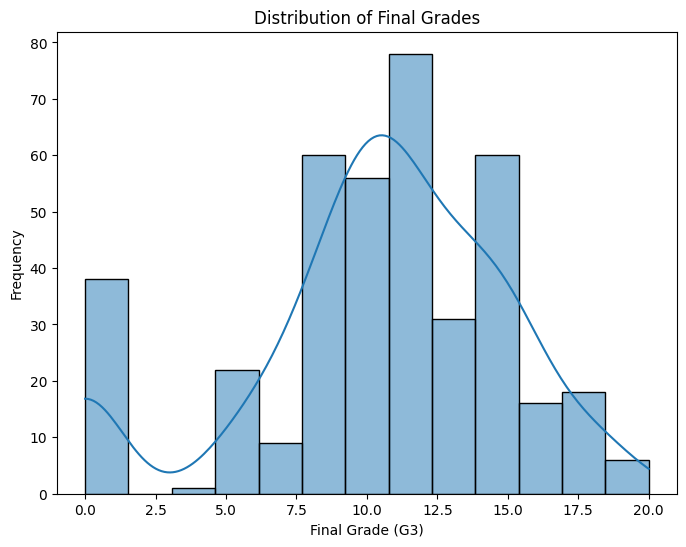

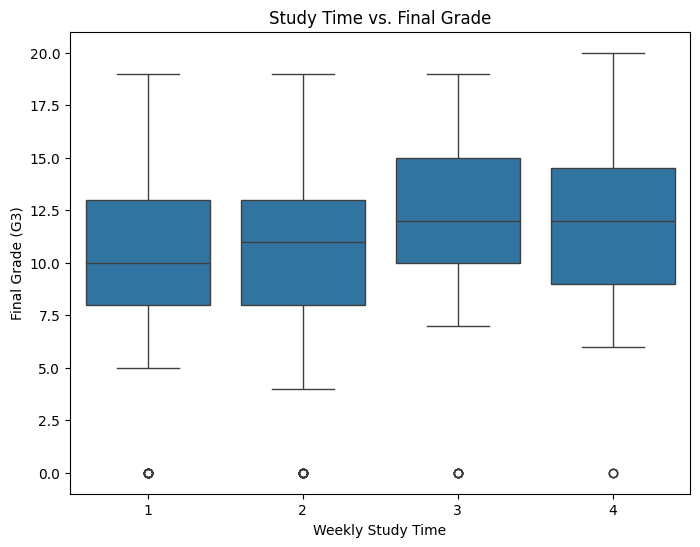

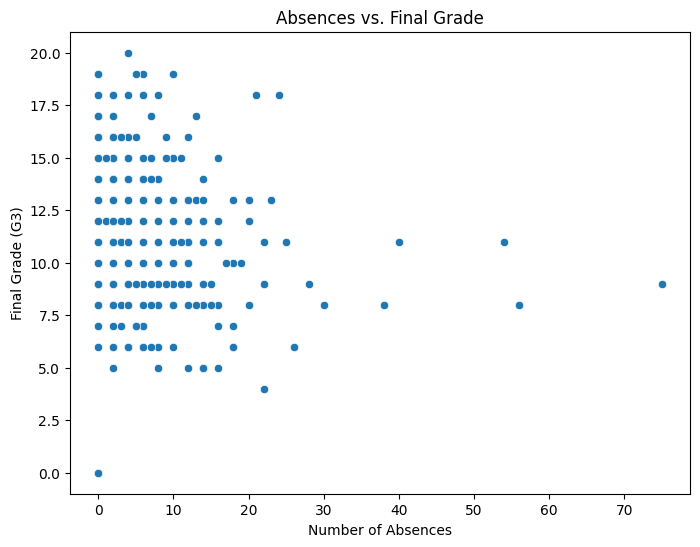

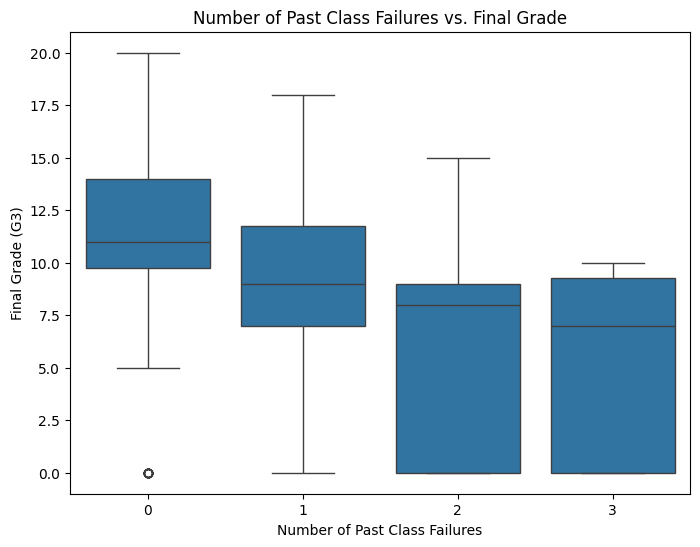

In [13]:


from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive (if not already mounted)
#drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/Colab Notebooks/IDSProject2024_StudentPerformance/student-mat.csv'

try:
    df_math = pd.read_csv(file_path, sep=';')  # Assuming semicolon separator
    print("DataFrame created successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


# Data Exploration and Visualization (example)
if 'df_math' in locals():
    # 1. Distribution of G3 (Final Grade)
    plt.figure(figsize=(8, 6))
    sns.histplot(df_math['G3'], kde=True)
    plt.title('Distribution of Final Grades')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Relationship between Study Time and Final Grade
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='studytime', y='G3', data=df_math)
    plt.title('Study Time vs. Final Grade')
    plt.xlabel('Weekly Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.show()

    # 3. Impact of absences on final grade
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='absences', y='G3', data=df_math)
    plt.title('Absences vs. Final Grade')
    plt.xlabel('Number of Absences')
    plt.ylabel('Final Grade (G3)')
    plt.show()

    # 4. (Example) Explore the relationship between failures and final grade
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='failures', y='G3', data=df_math)
    plt.title('Number of Past Class Failures vs. Final Grade')
    plt.xlabel('Number of Past Class Failures')
    plt.ylabel('Final Grade (G3)')
    plt.show()

    # Add more visualizations as needed
else:
    print("DataFrame 'df_math' not found. Please check the file path and try again.")

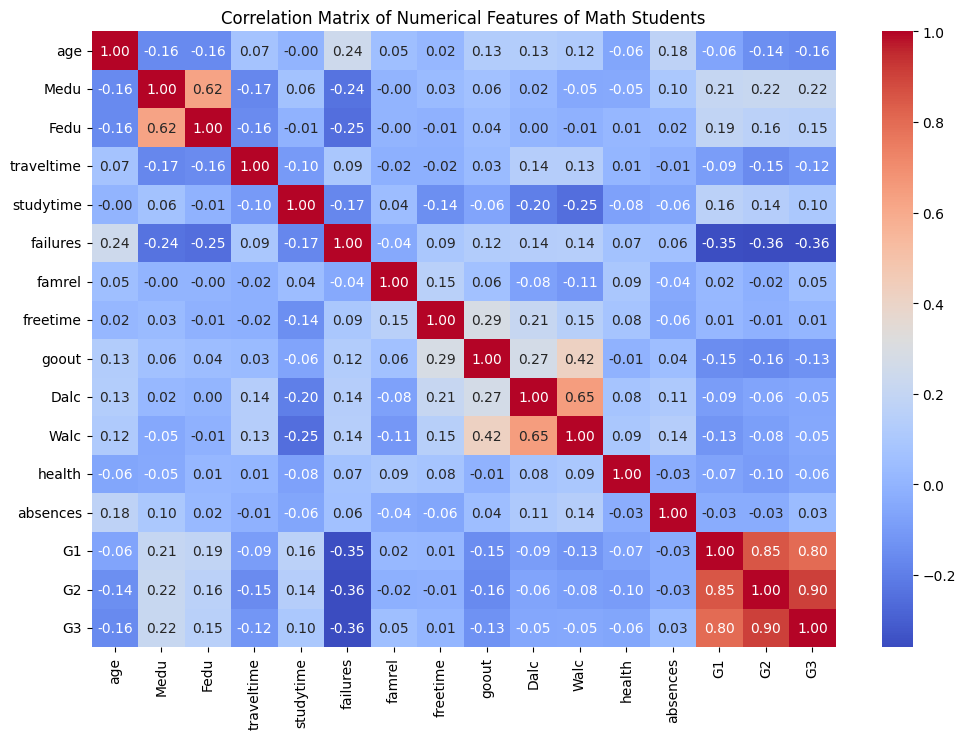

In [14]:

# Check if the dataframe exists before proceeding.
if 'df_math' in locals():
    # 4. Correlation Matrix Heatmap (for numerical features)
    numerical_cols = df_math.select_dtypes(include=['number']).columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_math[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features of Math Students')
    plt.show()
else:
    print("DataFrame 'df_math not found. Please run the code to create the dataframe first.")

DataFrame created successfully.


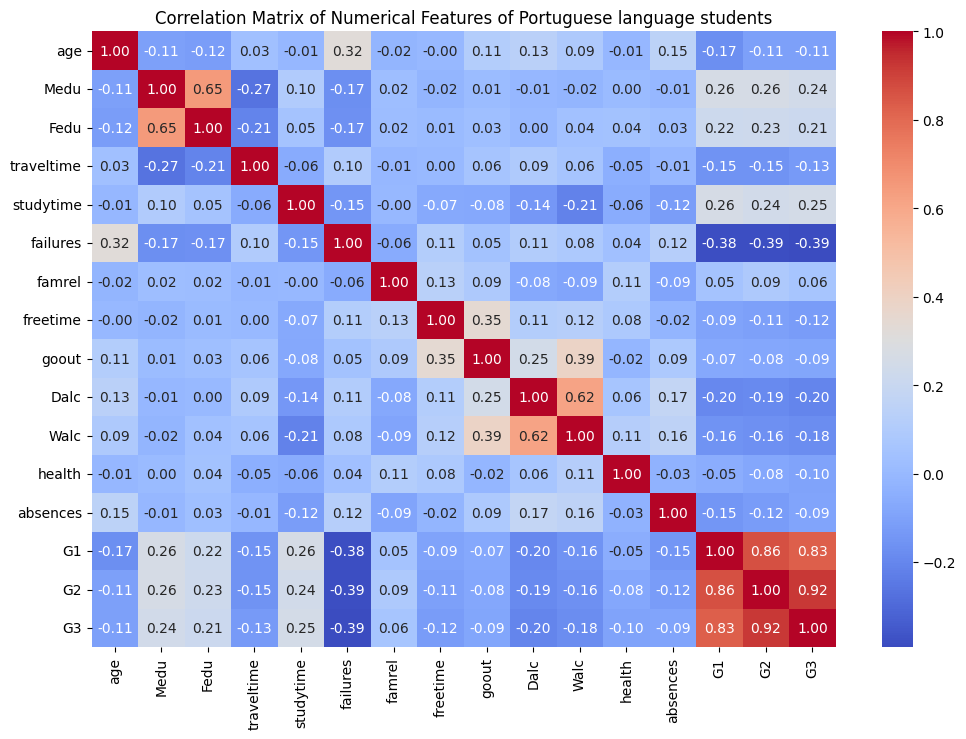

In [15]:

file_path = '/content/drive/My Drive/Colab Notebooks/IDSProject2024_StudentPerformance/student-por.csv'

try:
    df_por = pd.read_csv(file_path, sep=';')  # Assuming semicolon separator
    print("DataFrame created successfully.")

    # 4. Correlation Matrix Heatmap (for numerical features)
    numerical_cols = df_por.select_dtypes(include=['number']).columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_por[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features of Portuguese language students')
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

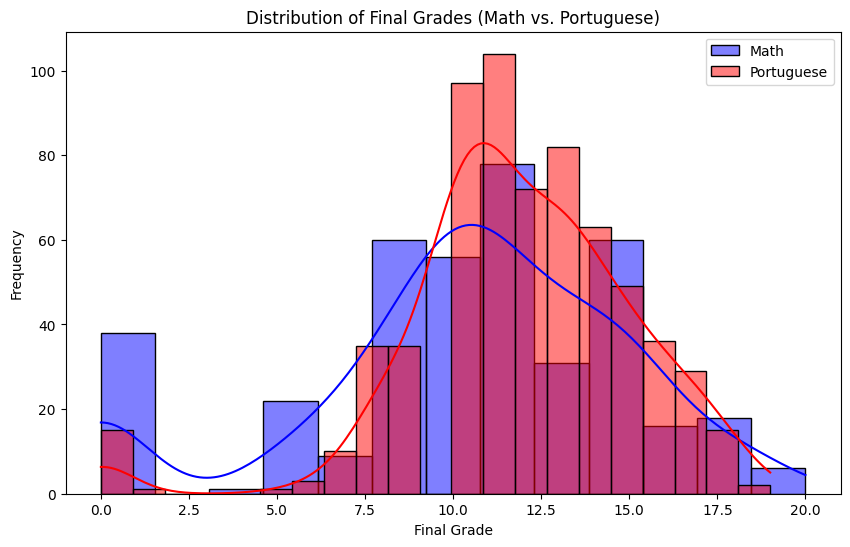

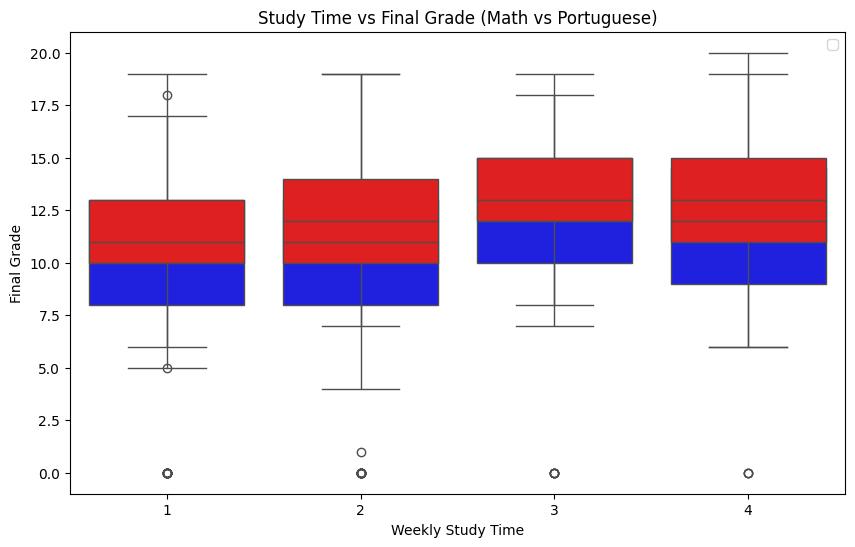

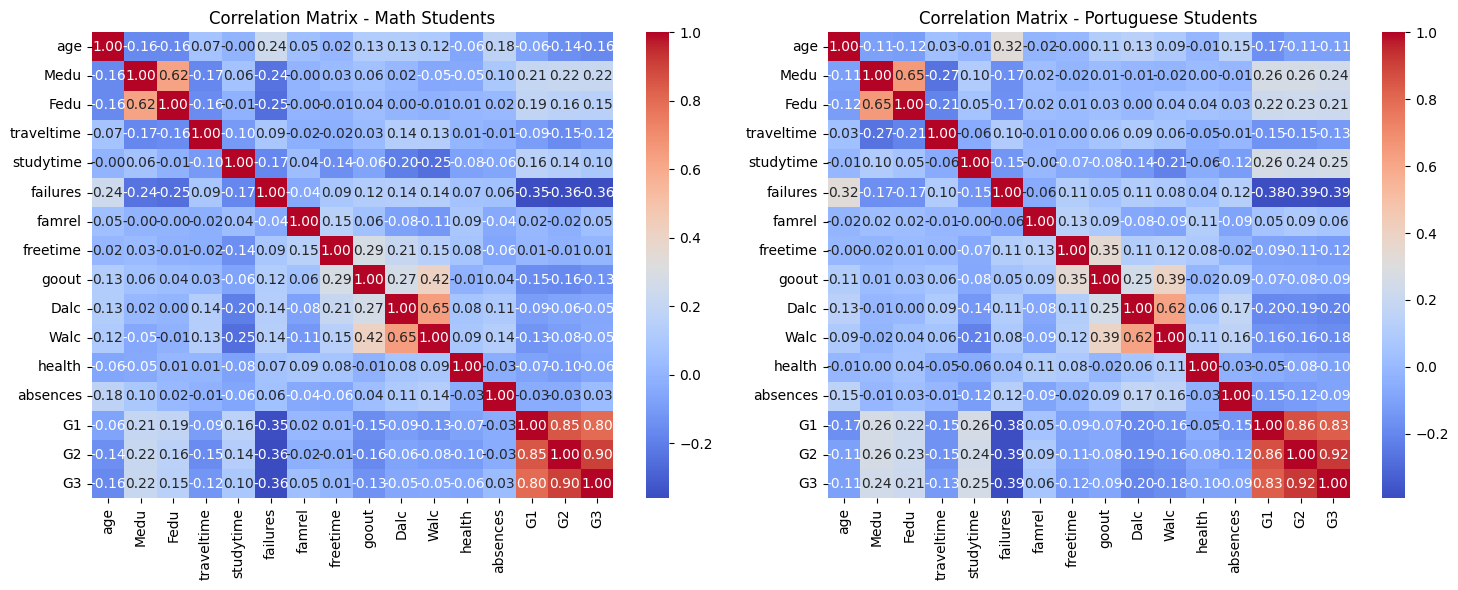

Average Absences (Math): 5.708860759493671
Average Absences (Portuguese): 3.6594761171032357


In [16]:


# ... (Your existing code)

# Compare the distributions of final grades
plt.figure(figsize=(10, 6))
sns.histplot(df_math['G3'], kde=True, label='Math', color='blue', alpha=0.5)
sns.histplot(df_por['G3'], kde=True, label='Portuguese', color='red', alpha=0.5)
plt.title('Distribution of Final Grades (Math vs. Portuguese)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Compare study time vs final grade
plt.figure(figsize=(10,6))
sns.boxplot(x='studytime', y='G3', data=df_math, color='blue')#, label='Math')
sns.boxplot(x='studytime', y='G3', data=df_por, color='red')#, label='Portuguese')
plt.title('Study Time vs Final Grade (Math vs Portuguese)')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade')
plt.legend()
plt.show()


# Compare the correlation matrices
# Calculate correlations for numerical features

numerical_cols_math = df_math.select_dtypes(include=['number']).columns
numerical_cols_por = df_por.select_dtypes(include=['number']).columns

corr_math = df_math[numerical_cols_math].corr()  # Calculate correlation for numerical columns only
corr_por = df_por[numerical_cols_por].corr()  # Calculate correlation for numerical columns only


#corr_math = df_math.corr()
#corr_por = df_por.corr()


# Plotting the correlation matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(corr_math, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Math Students')

sns.heatmap(corr_por, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Portuguese Students')

plt.tight_layout() # Adjusts subplot params for a tight layout.
plt.show()

#Further Comparisons (Examples)
# Compare the average absences between the groups
print("Average Absences (Math):", df_math['absences'].mean())
print("Average Absences (Portuguese):", df_por['absences'].mean())

# Compare the impact of failures on final grades
# ... (boxplot comparisons as above)

# ... (Add more comparisons as needed based on your specific analysis)

In [17]:

import numpy as np
def find_strongest_correlations(correlation_matrix, threshold=0.5):
    """
    Finds the strongest positive and negative correlations in a correlation matrix.

    Args:
        correlation_matrix: A Pandas DataFrame representing the correlation matrix.
        threshold: The minimum absolute correlation value to consider as "strong".

    Returns:
        A dictionary containing two lists: 'positive' and 'negative', each containing tuples
        of (feature1, feature2, correlation_value) for the strongest correlations.
    """
    strongest_correlations = {'positive': [], 'negative': []}

    # Remove diagonal part
    correlation_matrix = correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))

    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(correlation_matrix)):
        for j in range(i+1, len(correlation_matrix.columns)):
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]

            if abs(correlation_value) >= threshold:
                if correlation_value > 0:
                    strongest_correlations['positive'].append((feature1, feature2, correlation_value))
                else:
                    strongest_correlations['negative'].append((feature1, feature2, correlation_value))

    # Sort based on correlation value
    strongest_correlations['positive'].sort(key=lambda x: x[2], reverse=True)
    strongest_correlations['negative'].sort(key=lambda x: x[2])

    return strongest_correlations

# Find strongest correlations for math students
strongest_correlations_math = find_strongest_correlations(corr_math)

print("Strongest correlations for Math Students:")
print("Positive Correlations:")
for feature1, feature2, correlation in strongest_correlations_math['positive']:
    print(f"{feature1} and {feature2}: {correlation:.2f}")
print("\nNegative Correlations:")
for feature1, feature2, correlation in strongest_correlations_math['negative']:
    print(f"{feature1} and {feature2}: {correlation:.2f}")

# Find strongest correlations for portuguese students
strongest_correlations_por = find_strongest_correlations(corr_por)

print("\n\nStrongest correlations for Portuguese Students:")
print("Positive Correlations:")
for feature1, feature2, correlation in strongest_correlations_por['positive']:
    print(f"{feature1} and {feature2}: {correlation:.2f}")

print("\nNegative Correlations:")
for feature1, feature2, correlation in strongest_correlations_por['negative']:
    print(f"{feature1} and {feature2}: {correlation:.2f}")

Strongest correlations for Math Students:
Positive Correlations:
G2 and G3: 0.90
G1 and G2: 0.85
G1 and G3: 0.80
Dalc and Walc: 0.65
Medu and Fedu: 0.62

Negative Correlations:


Strongest correlations for Portuguese Students:
Positive Correlations:
G2 and G3: 0.92
G1 and G2: 0.86
G1 and G3: 0.83
Medu and Fedu: 0.65
Dalc and Walc: 0.62

Negative Correlations:


In [18]:

def combine_strongest_correlations(corr_matrix, target_col='G3'):
    """Combines the strongest positive and negative correlations with the target column."""

    # Remove G1, G2
    #corr_matrix = corr_matrix.drop(columns=['G1', 'G2'])
    #corr_matrix = corr_matrix.drop(index=['G1', 'G2'])

    # Sort by absolute correlation value with G3
    corr_with_g3 = corr_matrix[target_col].abs().sort_values(ascending=False)

    # Get the top 6 positive and 6 negative correlations with G3 (excluding G3 itself)
    top_6_positive = corr_with_g3[corr_with_g3.index != target_col].head(6)
    bottom_6_negative = corr_with_g3[corr_with_g3.index != target_col].tail(6)

    # Combine the indices into a single list
    combined_indices = list(top_6_positive.index) + list(bottom_6_negative.index)

    return combined_indices


# Get the combined indices for math and portuguese
combined_indices_math = combine_strongest_correlations(corr_math)
combined_indices_por = combine_strongest_correlations(corr_por)

print("Combined strongest correlations (Math):", combined_indices_math)
print("Combined strongest correlations (Portuguese):", combined_indices_por)

Combined strongest correlations (Math): ['G2', 'G1', 'failures', 'Medu', 'age', 'Fedu', 'health', 'Dalc', 'Walc', 'famrel', 'absences', 'freetime']
Combined strongest correlations (Portuguese): ['G2', 'G1', 'failures', 'studytime', 'Medu', 'Fedu', 'freetime', 'age', 'health', 'absences', 'goout', 'famrel']


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data (assuming df_math and df_por are your DataFrames)
def prepare_data(df, target_column='G3'):
    # Select features and target
    features = combined_indices_math  # Use the combined indices from previous analysis
    X = df[features]
    y = df[target_column]

    # Convert categorical features to numerical using one-hot encoding
    X = pd.get_dummies(X)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


# Train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
  if model_name == 'Linear Regression':
    model = LinearRegression()
  elif model_name == 'Decision Tree':
    model = DecisionTreeRegressor(random_state=42)
  elif model_name == 'Random Forest':
    model = RandomForestRegressor(random_state=42)
  elif model_name == 'SVR':
    model = SVR()
  elif model_name == 'KNN':
    model = KNeighborsRegressor()
  else:
    return None, None

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2


# Models to train
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']

# DataFrames
dataframes = {'Math': df_math, 'Portuguese': df_por}

# Train and evaluate for each dataset and model
results = {}
for dataset_name, df in dataframes.items():
  X_train, X_test, y_train, y_test = prepare_data(df)
  results[dataset_name] = {}
  for model_name in models:
    mse, r2 = train_and_evaluate(X_train, X_test, y_train, y_test, model_name)
    results[dataset_name][model_name] = {'MSE': mse, 'R-squared': r2}


# Print or visualize the results
for dataset_name, model_results in results.items():
  print(f"\nResults for {dataset_name} students:")
  for model_name, metrics in model_results.items():
    print(f"  {model_name}: MSE = {metrics['MSE']:.2f}, R-squared = {metrics['R-squared']:.2f}")


Results for Math students:
  Linear Regression: MSE = 4.39, R-squared = 0.79
  Decision Tree: MSE = 5.56, R-squared = 0.73
  Random Forest: MSE = 3.08, R-squared = 0.85
  SVR: MSE = 4.10, R-squared = 0.80
  KNN: MSE = 3.77, R-squared = 0.82

Results for Portuguese students:
  Linear Regression: MSE = 1.35, R-squared = 0.86
  Decision Tree: MSE = 4.15, R-squared = 0.57
  Random Forest: MSE = 1.58, R-squared = 0.84
  SVR: MSE = 1.69, R-squared = 0.83
  KNN: MSE = 1.87, R-squared = 0.81


In [20]:


# Print or visualize the results
for dataset_name, model_results in results.items():
  print(f"\nResults for {dataset_name} students:")
  for model_name, metrics in model_results.items():
    print(f"  {model_name}: R-squared = {metrics['R-squared']:.2f}")


Results for Math students:
  Linear Regression: R-squared = 0.79
  Decision Tree: R-squared = 0.73
  Random Forest: R-squared = 0.85
  SVR: R-squared = 0.80
  KNN: R-squared = 0.82

Results for Portuguese students:
  Linear Regression: R-squared = 0.86
  Decision Tree: R-squared = 0.57
  Random Forest: R-squared = 0.84
  SVR: R-squared = 0.83
  KNN: R-squared = 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Results for Math students:
  MSE = 18.93, R-squared = 0.08

Neural Network Results for Portuguese students:
  MSE = 8.59, R-squared = 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


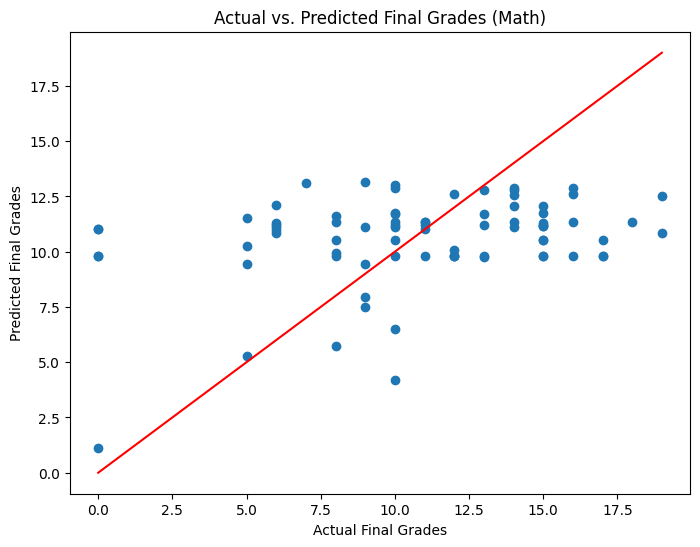

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


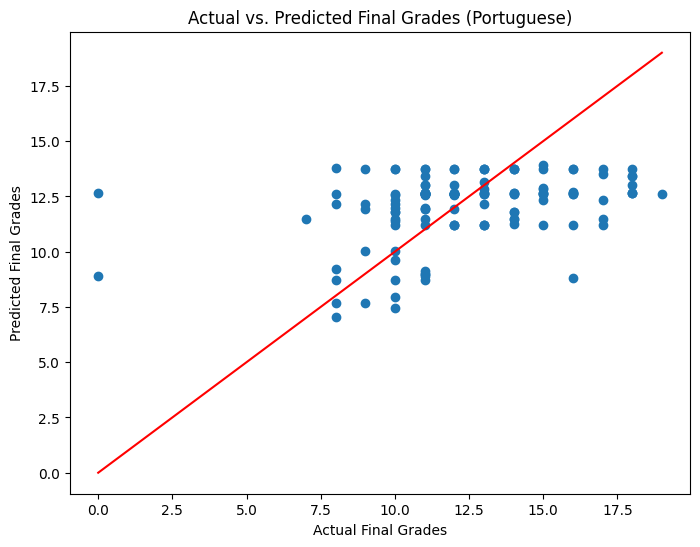

In [21]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df_math' and 'df_por' are already defined and preprocessed

def prepare_data_nn(df, target_column='G3'):
    # Select features and target
    features = [ 'studytime', 'failures', 'absences'] # Example features, adjust as needed
    X = df[features]
    y = df[target_column]

    # Convert categorical features to numerical using one-hot encoding if necessary
    # X = pd.get_dummies(X)

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Train and evaluate neural network model
def train_and_evaluate_nn(X_train, X_test, y_train, y_test):
    model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# DataFrames
dataframes = {'Math': df_math, 'Portuguese': df_por}

# Train and evaluate for each dataset
nn_results = {}
for dataset_name, df in dataframes.items():
    X_train, X_test, y_train, y_test = prepare_data_nn(df)
    mse, r2 = train_and_evaluate_nn(X_train, X_test, y_train, y_test)
    nn_results[dataset_name] = {'MSE': mse, 'R-squared': r2}

# Display neural network results
for dataset_name, metrics in nn_results.items():
    print(f"\nNeural Network Results for {dataset_name} students:")
    print(f"  MSE = {metrics['MSE']:.2f}, R-squared = {metrics['R-squared']:.2f}")

# Visualization of predictions (optional)
for dataset_name, df in dataframes.items():
    X_train, X_test, y_train, y_test = prepare_data_nn(df)
    model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Final Grades")
    plt.ylabel("Predicted Final Grades")
    plt.title(f"Actual vs. Predicted Final Grades ({dataset_name})")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line
    plt.show()

Lasso Regression: MSE = 8.27, R-squared = 0.15
Ridge Regression: MSE = 8.29, R-squared = 0.15


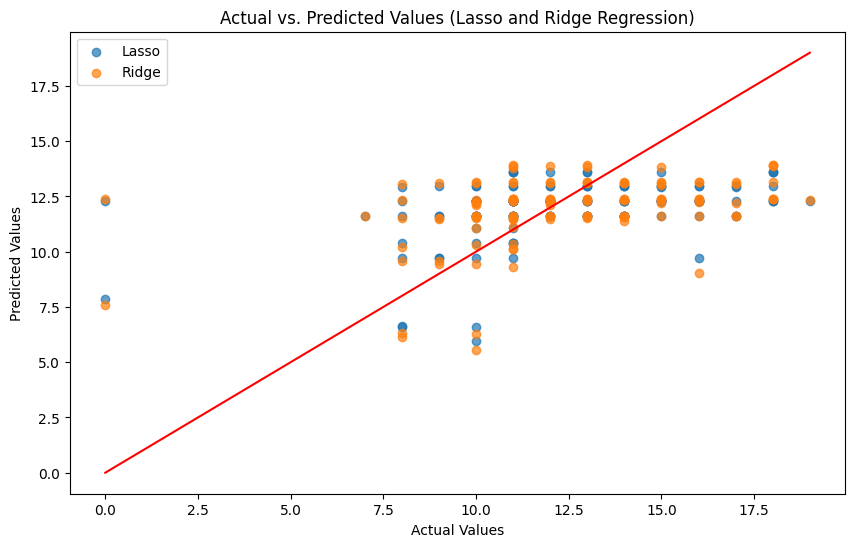

In [22]:


from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge Regression
ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R-squared = {r2_lasso:.2f}")
print(f"Ridge Regression: MSE = {mse_ridge:.2f}, R-squared = {r2_ridge:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Lasso and Ridge Regression)")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red') # Add a diagonal line
plt.legend()
plt.show()

DataFrame created successfully.
Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')


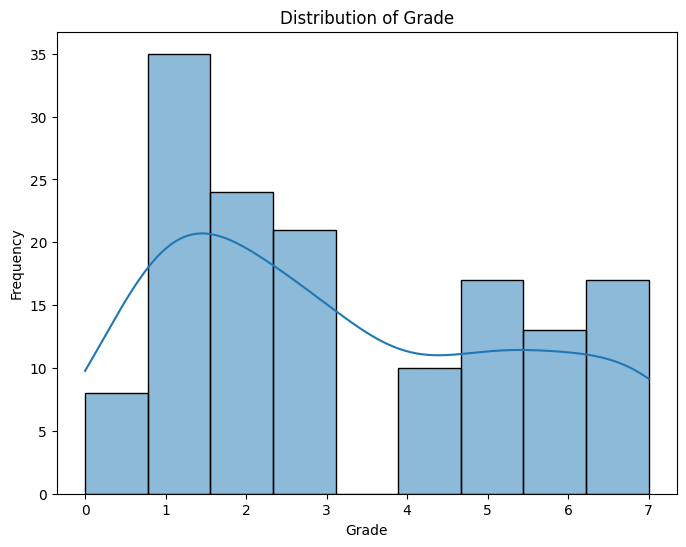

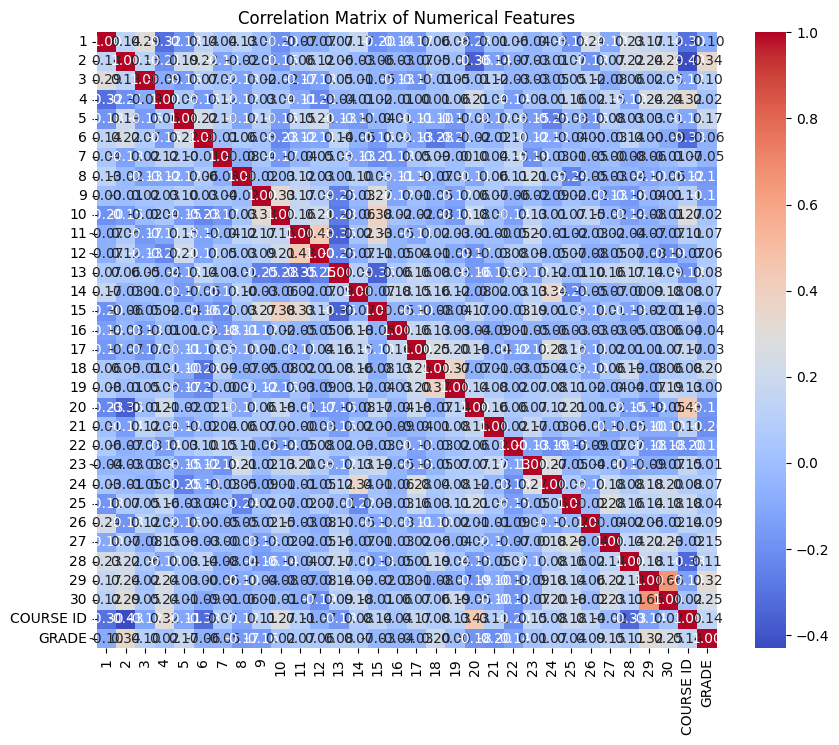

In [23]:


from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/IDSProject2024_StudentPerformance/'

try:
    df = pd.read_csv(file_path + "DATA (1).csv")  # Use the correct filename
    print("DataFrame created successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


print(df.columns)
# Assuming 'DATA (1).csv' has relevant columns, replace these with actual column names.
# Example visualizations. Adapt column names to your data.
if 'df' in locals():
    # 1. Histogram of a numerical column (e.g., 'Age')
    plt.figure(figsize=(8, 6))
    sns.histplot(df['GRADE'], kde=True) # Replace 'Age'
    plt.title('Distribution of Grade')
    plt.xlabel('Grade')
    plt.ylabel('Frequency')
    plt.show()




    # 5. Correlation heatmap (for numerical features)
    numerical_cols = df.select_dtypes(include=['number']).columns
    if len(numerical_cols) > 1:  # Check if there are at least two numerical columns for the heatmap
      plt.figure(figsize=(10, 8))
      sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
      plt.title('Correlation Matrix of Numerical Features')
      plt.show()
    else:
        print("Not enough numerical columns for a correlation heatmap.")

else:
    print("DataFrame 'df' not found. Please check the file path and try again.")